# Data Loading and Preparation
In this notebook we show: 
- How to use our data loader implementation specifically built for the DeftCorpus dataset ?
- How we prepared the DeftCorpus dataset for usage for Sentence Definition Classification ?

In [1]:
#imports cell
import pandas as pd
from source.data_loader import DeftCorpusLoader

## Loading dataset for classification using DeftCorpusLoader

Possible Steps for Class Usages:

- Create instance of the class, with the path to your **"data" folder** from "deft_corpus" folder.


- Call `load_classification_data` on class instance with **no arguments passed**, this will create two folders in "deft_files" folder by default including the re-formatted for classification task. Then will load these files and return two dataframes. The two dataframes include two splits, a training split and a development split (used for testing purposes during Training phase of Competition)


- Alternatively, you can call `convert_to_classififcation_format` on class instance with **no arguments passed or pass arguments to specify folders and not use defaults** to first convert and create the two folders. The, call `load_classification_data` with the folders paths created from by the first method. This alternative way is provided for those who intend to work with **their own folder paths rather than the provided defaults.**

*In this notebook, we use the rather easier and preferred method one.*

In [28]:
deft_loader = DeftCorpusLoader("deft_corpus/data")
trainframe, devframe = deft_loader.load_classification_data()

### Exploring dataset 
- There are two columns: `Sentence` which has the sentence text, `HasDef` boolean value to determine whether it is a definition or not. 
- There are **18,157 instances for training** and **865 instances for development** (testing purposes here)

In [3]:
deft_loader.explore_data(trainframe, "train")
deft_loader.explore_data(devframe, "dev")


Head of  train  Dataframe:
                                            Sentence  HasDef
0   3918 . You may recall that 6 x 6 = 36 , 6 x 7...       0
1   Memorizing these facts is rehearsal . Another...       1
2   Chunking is useful when trying to remember in...       0
3   3921 . Use elaborative rehearsal : In a famou...       1
4      Their theory is called levels of processing .       0
Number of instances of  train is 18157

Head of  dev  Dataframe:
                                            Sentence  HasDef
0   309 . Both photosystems have the same basic s...       1
1   Each photosystem is serviced by the light - h...       0
2   The absorption of a single photon or distinct...       0
3   390 . Mistakes in the duplication or distribu...       0
4   To prevent a compromised cell from continuing...       0
Number of instances of  dev is 865


### Exploring classes and classification problem
- There are **12,143 instances** of class label `0` ---> `This sentence is not a definition`.
- There are **6,014 instances** of class label `1` ---> `This sentence is a definition`.
- Determining problem: **Binary Classification Problem.**
- A clear **classes imbalance** case exists in our data. 

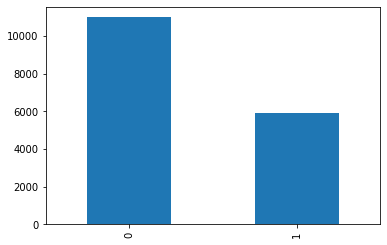

In [7]:
trainframe.HasDef.value_counts().plot.bar()

## Preprocessing dataset using Spacy
- Tokenizing corpus sentences into word tokens.
- Lemmatization of each token. 
- Lowercase each token. 
- Removing stop words, punctuations, spaces and non alphanumeric characters.
- Adds a column on the dataframe for preprocessed tokens according to above rules.

In [29]:
deft_loader.preprocess_data(trainframe)
trainframe

,Sentence,HasDef,Parsed
0,"3918 . You may recall that 6 x 6 = 36 , 6 x 7...",0,"[recall, x, x, x]"
1,Memorizing these facts is rehearsal . Another...,1,"[memorizing, fact, rehearsal, strategy, chunk,..."
2,Chunking is useful when trying to remember in...,0,"[chunking, useful, try, remember, information,..."
3,3921 . Use elaborative rehearsal : In a famou...,1,"[use, elaborative, rehearsal, famous, article,..."
4,Their theory is called levels of processing .,0,"[theory, call, level, process]"
...,...,...,...
18152,The term culture refers to all of the beliefs...,1,"[term, culture, refer, belief, custom, art, tr..."
18153,Culture is transmitted to people through lang...,0,"[culture, transmit, people, language, model, c..."
18154,4306 . Another method for assessment of perso...,0,"[method, assessment, personality, projective, ..."
18155,This kind of test relies on one of the defens...,1,"[kind, test, rely, defense, mechanism, propose..."


### Cleaning dataset
We make the following findings from the data shown above: 
- There are sentences which are likely to be of **very low importance** and contribution to the dataset. **Identifying and removing** these sentences can improve the classficiation process. Look for example at instance 1 from above, This list `[recall, x, x, x]` probably won't be of any importance when used with the classifier. 


- Devised method inferred from what the data looks like: **Only keep instances with number of tokens more than or equal to 5 tokens.**


- When this method is applied, **1,151 instances of non definitions** are removed while **120 only sentences that are definition** are removed. That proves that sentences with less than 5 tokens could be very less important to our work and also indeed helps to reslove the class imbalance problem in dataset a little bit.

In [30]:
deft_loader.clean_data(trainframe)
trainframe

,Sentence,HasDef,Parsed
1,Memorizing these facts is rehearsal . Another...,1,"[memorizing, fact, rehearsal, strategy, chunk,..."
2,Chunking is useful when trying to remember in...,0,"[chunking, useful, try, remember, information,..."
3,3921 . Use elaborative rehearsal : In a famou...,1,"[use, elaborative, rehearsal, famous, article,..."
5,If we want to remember a piece of information...,0,"[want, remember, piece, information, think, de..."
6,3924 . Cognitive development involves learnin...,1,"[cognitive, development, involve, learn, atten..."
...,...,...,...
18152,The term culture refers to all of the beliefs...,1,"[term, culture, refer, belief, custom, art, tr..."
18153,Culture is transmitted to people through lang...,0,"[culture, transmit, people, language, model, c..."
18154,4306 . Another method for assessment of perso...,0,"[method, assessment, personality, projective, ..."
18155,This kind of test relies on one of the defens...,1,"[kind, test, rely, defense, mechanism, propose..."


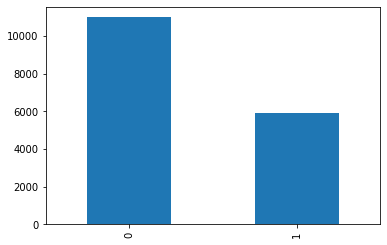

In [31]:
trainframe.HasDef.value_counts().plot.bar()

In [32]:
trainframe.drop_duplicates(subset= "Sentence", inplace=True)

In [39]:
def concat_list(toklist):
    return ' '.join(toklist)
trainframe["ParsedConcat"] = trainframe.Parsed.apply(concat_list)


In [43]:
deft_loader.preprocess_data(devframe)
devframe["ParsedConcat"] = devframe.Parsed.apply(concat_list)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,1))),
                 ('scalar', StandardScaler(with_mean=False)),
                 ('classifier', classifier)])

In [59]:
# model generation
pipe.fit(trainframe["ParsedConcat"],trainframe["HasDef"])

/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('scalar',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_rati

In [52]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(devframe["ParsedConcat"])
y_test = devframe["HasDef"]
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))
metrics.f1_score(y_test, predicted)

Logistic Regression Accuracy: 0.7236994219653179
Logistic Regression Precision: 0.5830388692579506
Logistic Regression Recall: 0.5769230769230769


0.5799648506151143